<a href="https://colab.research.google.com/github/JulTob/Mathematics/blob/master/ConvexOpt/OptConvex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTIMIZACIÓN CONTINUA

# 0. Libraries and Preparations

> Run all code twice, for the kernerll should crash first, and then the code will work finding all dependencies.

In [1]:
# (1) Paquetes del sistema para Cairo/Pango + toolchain
!sudo apt-get update -y
!sudo apt-get install -y \
  build-essential pkg-config ninja-build \
  libcairo2-dev libpango1.0-dev libglib2.0-dev libharfbuzz-dev \
  ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cli.github.com/packages stable InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [2]:
%pip install -U pip wheel
%pip install -U manim manimpango pycairo
%load_ext manim

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


The manim module is not an IPython extension.


In [3]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-extra texlive-pictures texlive-science texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-complutum fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-porson fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo
  fonts-noto-color-emoji fonts-noto-core fonts-noto-mono fonts-oflb-as

Runer doesn't have to be next to the compiler.

In [7]:
from manim import *
class Hello(Scene):
    def construct(self):
        self.play(Write(Text("Manim")))
        self.wait(5.5)

In [6]:
%%manim -v WARNING -qm --renderer=cairo Hello

Manim Community v0.19.0

In [9]:
%pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.6 MB/s  0:00:00


In [93]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string
    )
  )

# 1. Introducción.

La optimización se entiende como el arte de resolver un problema de la forma más eficiente posible: seleccionar la mejor alternativa dentro de un conjunto de opciones utilizando la menor cantidad de recursos

Esta disciplina es ubicua en la ciencia de datos y la inteligencia artificial. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística, planificación de la producción y cadenas de suministro

# 2. Modelización matemática de un problema de optimización

### Etapas del proceso de modelización:
- definición del problema,
- construcción del modelo,
- solución,
- validación
- y aplicación de los resultados

### Definición del problema:

- Describir la meta y el objetivo del estudio.
- Identificar las alternativas de decisión.
- Reconocer limitaciones, restricciones y requisitos

### Construcción del modelo
Consiste en traducir la situación real a variables, funciones objetivo y restricciones.

Esto requiere elegir variables representativas, formalizar la función que se quiere optimizar y establecer el conjunto de restricciones.

### Implantación y validación:
Una vez obtenido el modelo y su solución, se comprueba su validez respecto al problema real y se implementan los resultados para tomar decisiones.

# 3. Elementos y estructura de un problema

## Variables de decisión $(x)$:
Representan las acciones que se pueden tomar y pertenecen a un dominio $𝕏$





In [106]:
import pulp

# Create a LP problem
prob = pulp.LpProblem("Decision", pulp.LpMaximize)

# Define decision variables
x1 = pulp.LpVariable("x1", lowBound=0, cat='Continuous')
x2 = pulp.LpVariable("x2", lowBound=0, cat='Continuous')

# Store variables in a list for vector-like operations
X = [x1, x2]


In [108]:
from manim import *

class RadarFeasibleRegion(Scene):
    def construct(self):
        # Create arrows for x1 and x2 axes
        x1_axis = Arrow(ORIGIN, 3 * RIGHT, buff=0, color=RED)
        x2_axis = Arrow(ORIGIN, 3 * UP, buff=0, color=GREEN)

        # Add labels to the axes
        x1_label = MathTex(r"x_1").next_to(x1_axis.get_end(), RIGHT)
        x2_label = MathTex(r"x_2").next_to(x2_axis.get_end(), UP)

        # Create the feasible region polygon (a square in the first quadrant)
        feasible_region = Polygon(
            ORIGIN,
            3 * RIGHT,
            3 * RIGHT + 3 * UP,
            3 * UP,
            fill_color="#FFFF00",  # Yellow color
            fill_opacity=0.2,
            stroke_width=0,
        )

        # Add objects to the scene
        self.play(Create(x1_axis), Write(x1_label))
        self.play(Create(x2_axis), Write(x2_label))
        self.play(FadeIn(feasible_region))

        # Add label for the Decision Space
        decision_space_label = MathTex(r"\mathbb{X} ;\text{ Decision Space}", color="#FFFF00").move_to(1.5*RIGHT + 1.5*UP) # Adjust position as needed

        self.play(Write(decision_space_label))


        self.wait(2)

In [62]:
%%manim -v WARNING -qm --renderer=cairo RadarFeasibleRegion


Manim Community v0.19.0

In [41]:
%%manim -v WARNING -qm --renderer=cairo RadarFeasibleRegion

Manim Community v0.19.0

In [14]:
# Solve the problem
prob.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal values of the decision variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the optimal value of the objective function
print("Optimal objective value =", prob.objective.value())

Status: Optimal
x1 = 3.3333333
x2 = 1.3333333
Optimal objective value = 12.666666500000002


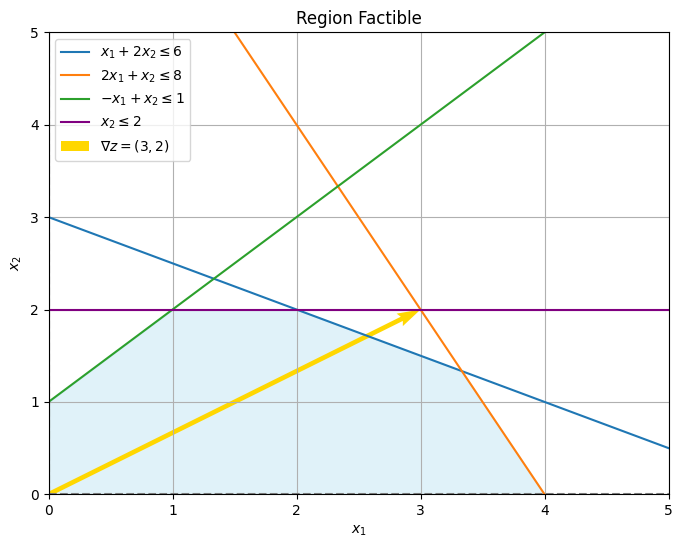

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
# x1 + 2x2 <= 6  => x2 <= (6 - x1)/2
# 2x1 + x2 <= 8  => x2 <= 8 - 2x1
# -x1 + x2 <= 1  => x2 <= 1 + x1
# x2 <= 2

x = np.linspace(0, 5, 400)
y1 = (6 - x) / 2
y2 = 8 - 2 * x
y3 = 1 + x
y4 = 2

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 6$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 8$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')
plt.axhline(y=y4, color='purple', linestyle='-', label=r'$x_2 \leq 2$')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(np.minimum(y1, y2), y3), y4),
    where=(x>=0) & (np.minimum(np.minimum(np.minimum(y1, y2), y3), y4)>=0),
    color='skyblue', alpha=0.25)

# Add the gradient vector of the objective function (3, 2)
plt.quiver(0, 0, 3, 2, color='gold', scale=1, angles='xy', scale_units='xy', label=r'$\nabla z = (3, 2)$')


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Region Factible')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2
Dado el siguiente problema lineal:

$$
\begin{matrix}
max  & 3x_1 & + & 2x_2 \\
s.a. & x_1 & + & 2x_2 & ≤ 6\\
     & 2x_1 & + & x_2 & ≤ 8\\
     & -x_1 & + & x_2 & ≤ 1 \\
     &      &   & x_2 & ≤ 2  \\
x_1,x_2 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$


1. Representa gráficamente la región factible del problema.

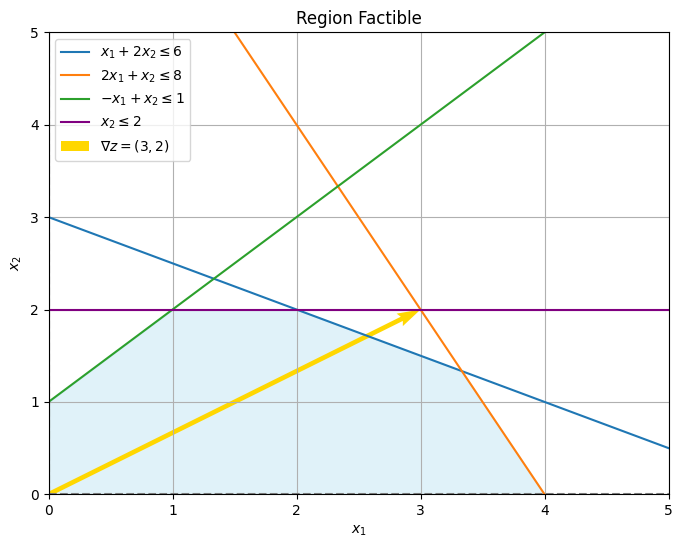

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
# x1 + 2x2 <= 6  => x2 <= (6 - x1)/2
# 2x1 + x2 <= 8  => x2 <= 8 - 2x1
# -x1 + x2 <= 1  => x2 <= 1 + x1
# x2 <= 2

x = np.linspace(0, 5, 400)
y1 = (6 - x) / 2
y2 = 8 - 2 * x
y3 = 1 + x
y4 = 2

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 6$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 8$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')
plt.axhline(y=y4, color='purple', linestyle='-', label=r'$x_2 \leq 2$')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(np.minimum(y1, y2), y3), y4),
    where=(x>=0) & (np.minimum(np.minimum(np.minimum(y1, y2), y3), y4)>=0),
    color='skyblue', alpha=0.25)

# Add the gradient vector of the objective function (3, 2)
plt.quiver(0, 0, 3, 2, color='gold', scale=1, angles='xy', scale_units='xy', label=r'$\nabla z = (3, 2)$')


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Region Factible')
plt.legend()
plt.grid(True)
plt.show()

2. Resuelve el problema en forma estándar por el algortimo del simplex


3. Identifica en la representación gráfica el recorrido por los puntos extremos que hace el algoritmo del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

6. ¿Cómo varía la solución óptima si se añade una nueva variable $x_3$ con coeficiente en la función objetivo $c_3 = 4$ y vector columna en las restricciones
$(1, 1, −1, −1)^t$?

7. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo
y los términos independientes del nuevo problema con tres variables.

# 6. Dada la siguiente tabla del simplex en un problema de minimización:

v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$
-----|---|----|-----|-----|-----|-----|---|-------
x    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2
y    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7
$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6
__r__ | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12

1. ¿La tabla dada corresponde a una solución óptima? Si no es así, continúa con las iteraciones hasta alcanzar una solución óptima?

2. Para la tabla óptima determinar la matriz $B^{−1}$ asociada con el punto extremo óptimo.

3. Determina cómo es la formulación matemática del problema lineal que se
está resolviendo con la tabla del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales

$$
\begin{matrix}
max  & x_1 & + & 2x_2 & + & x_3\\
s.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\
& x_1 & - & 2x_2 & + & 2x_3 & = 12\\
x_1,x_2, x_3 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$


# Task
Visualize the feasible region defined by $x_1 \geq 0$ and $x_2 \geq 0$ in 2D using Manim.

## Set up the manim scene

### Subtask:
Create a basic Manim scene with 2D axes for $x_1$ and $x_2$.


**Reasoning**:
Create a Manim scene with 2D axes for x1 and x2 as requested by the subtask.



In [15]:
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))
        self.wait()

## Define and plot constraint lines

### Subtask:
Represent the inequality constraints as lines in the Manim scene.


**Reasoning**:
Define the functions for the inequality constraints and create the corresponding lines to represent the boundaries of the feasible region.



In [16]:
class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        # Play the creation of the constraint lines
        self.play(Create(constraint_lines))

        # Wait after the animation
        self.wait()


## Indicate feasible region

### Subtask:
Shade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \geq 0, x_2 \geq 0$).


**Reasoning**:
Calculate the intersection points of the constraints to define the vertices of the feasible region polygon, then create and add the polygon to the scene with appropriate styling and animation.



In [17]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        self.wait(2)


## Label the feasible region

### Subtask:
Add text labels or annotations to indicate the feasible region.


**Reasoning**:
Add a text label "Feasible Region" within the shaded area and animate its appearance.



In [18]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

## Add axes labels

### Subtask:
Label the x and y axes as $x_1$ and $x_2$.


## Render the manim animation

### Subtask:
Render the manim animation to generate the video file of the visualization.


**Reasoning**:
Render the Manim scene to generate the video output of the feasible region visualization with the label.



In [19]:
%%manim -v WARNING -qm --renderer=cairo FeasibleRegion

Manim Community v0.19.0

TypeError: Mobject.__init__() got an unexpected keyword argument 'numbers_with_zero_on_right'

**Reasoning**:
The previous attempt to render the Manim scene failed due to an invalid keyword argument `numbers_with_zero_on_right` in the `Axes` configuration. This likely indicates a version incompatibility or a change in the Manim API. I need to remove this argument from the `Axes` configuration and try rendering again.



In [20]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

**Reasoning**:
Now that the invalid keyword argument has been removed from the `Axes` configuration, I can attempt to render the Manim scene again to generate the video output.



In [21]:
%%manim -v WARNING -qm --renderer=cairo FeasibleRegion

Manim Community v0.19.0

[11/01/25 00:06:42] ERROR    LaTeX compilation error: Missing } inserted.                   ]8;id=652;file:///usr/local/lib/python3.12/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=534516;file:///usr/local/lib/python3.12/dist-packages/manim/utils/tex_file_writing.py#314\314]8;;\
                                                                                                                   

                    ERROR    Context of error:                                              ]8;id=672871;file:///usr/local/lib/python3.12/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=133221;file:///usr/local/lib/python3.12/dist-packages/manim/utils/tex_file_writing.py#348\348]8;;\
                             -> $x_1$                                                                              
                             \end{align*}                                                                          
                             \end{document}                                                                        

ValueError: latex error converting to dvi. See log output above or the log file: media/Tex/0632982a94a7fec0.log

**Reasoning**:
The Manim rendering failed again, this time with a LaTeX compilation error related to "$x_1$". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r"$x_1$"` and `r"$x_2$"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.



In [22]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        # Use MathTex for axis labels
        x_label = axes.get_x_axis_label(MathTex(r"x_1")).shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(MathTex(r"x_2")).shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

**Reasoning**:
The provided text contains a Manim command within a code block, indicating it's a Python code execution request.



In [23]:
%%manim -v WARNING -qm --renderer=cairo FeasibleRegion

Manim Community v0.19.0

## Summary:

### Data Analysis Key Findings

*   A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.
*   Functions representing linear inequality constraints were defined and plotted as lines on the axes.
*   The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.
*   The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.
*   A text label "Feasible Region" was added and positioned within the shaded area to identify the feasible region.
*   Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.
*   The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.

### Insights or Next Steps

*   Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.
*   Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.
